In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


## Variable Description
   * gender: gender of the student
   * parental level of education:student's education level of parents
   * lunch: price level of students' lunches.
   * test preparation course : whether students attend exam preparation courses
   * math score, reading score, writing score: test scores of each student
   * race/ethnicity: student's race / ethnicity class

## **Load and Check Data**

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import networkx as nx

In [3]:
data=pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

In [5]:
# look through the variables 

data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### **Descriptive Statistics**

In [8]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
#Unique values in data
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Percentage Of Gender

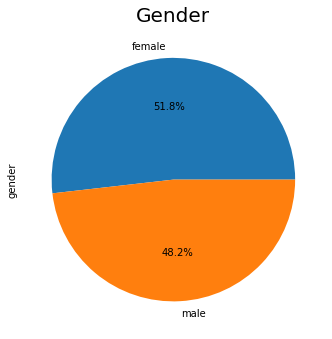

In [10]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Gender',fontsize = 20)
data['gender'].value_counts().plot.pie(autopct="%1.1f%%")

### Percentage Of Ethinicity

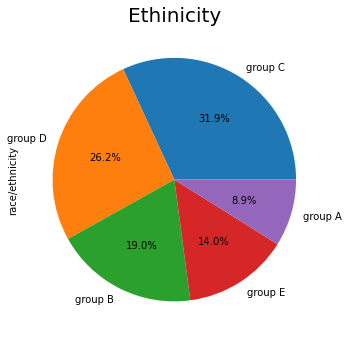

In [11]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)

plt.subplot(142)
plt.title('Ethinicity',fontsize = 20)
data['race/ethnicity'].value_counts().plot.pie(autopct="%1.1f%%")

### Percentage Of Lunch

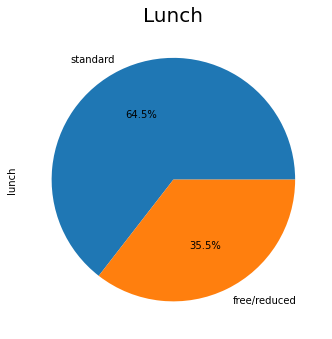

In [12]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Lunch',fontsize = 20)
data['lunch'].value_counts().plot.pie(autopct="%1.1f%%")

### Percentage Of Parental-Education

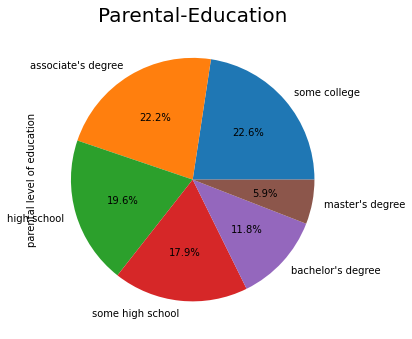

In [13]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Parental-Education',fontsize = 20)
data['parental level of education'].value_counts().plot.pie(autopct="%1.1f%%")

# **Analysis**
* Correlation Between Scores

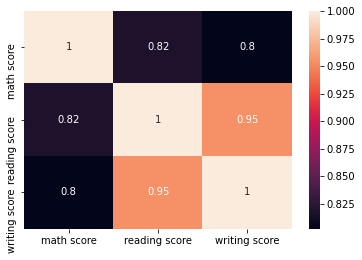

In [14]:
#finding mutual relationship or connection between two or more variables

correlation = data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

* Pair Plot of Scores

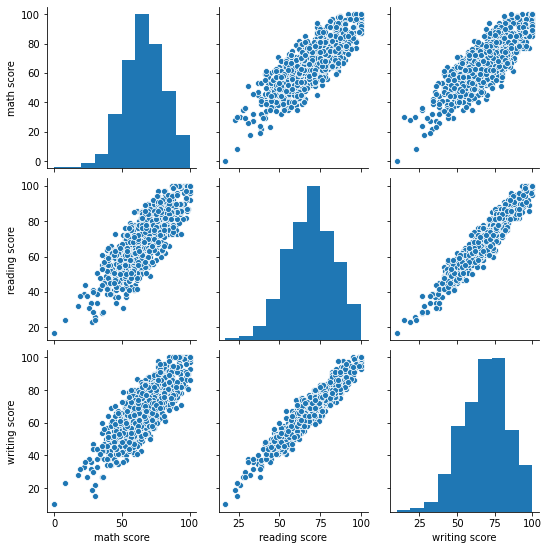

In [15]:
sns.pairplot(data)

**using diffrent plotting methods understand the variable relationships**

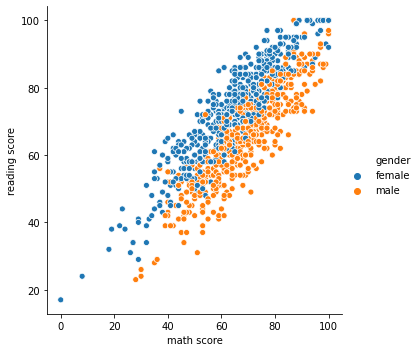

In [16]:
sns.relplot(x='math score',y='reading score',hue='gender',data=data)

In [17]:
data["mean score"] = ((data['math score'] + data["reading score"] + data["writing score"]) / 3).round()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


* Distribution Of Math Score

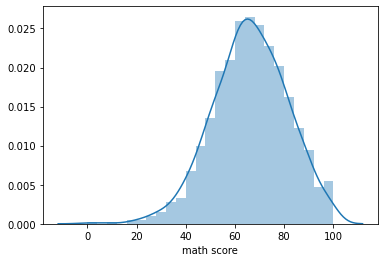

In [18]:
sns.distplot(data['math score'])

* Distribution Of Reading Score

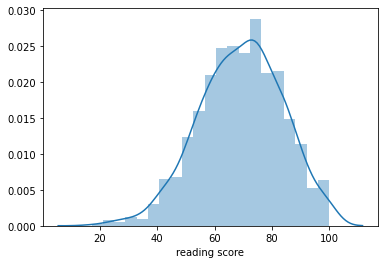

In [19]:
sns.distplot(data['reading score'])

* Distribution Of Writing Score

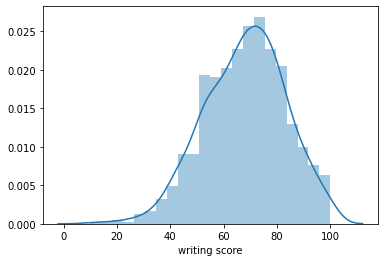

In [20]:
sns.distplot(data['writing score'])

* ### Box-Plot for each score to detect Outliers

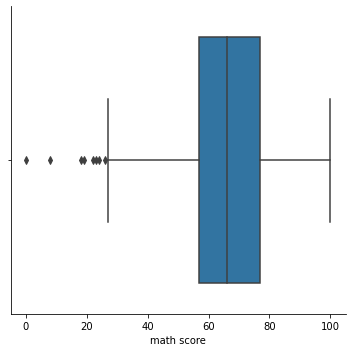

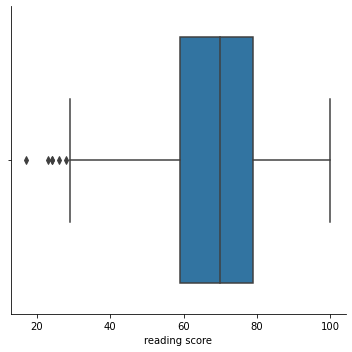

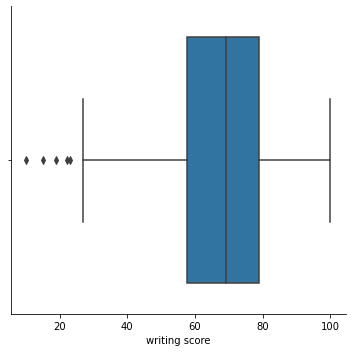

In [21]:
sns.catplot(x='math score',kind='box',data=data)
sns.catplot(x='reading score',kind='box',data=data)
sns.catplot(x='writing score',kind='box',data=data)

# Data preparation for modelling

In [22]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data['gender'] = lc.fit_transform(data['gender'])
data['race/ethnicity'] = lc.fit_transform(data['race/ethnicity'])
data['parental level of education'] = lc.fit_transform(data['parental level of education'])
data['lunch'] = lc.fit_transform(data['lunch'])
data['test preparation course'] = lc.fit_transform(data['test preparation course'])
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0


* 0 : Female
* 1 : Male

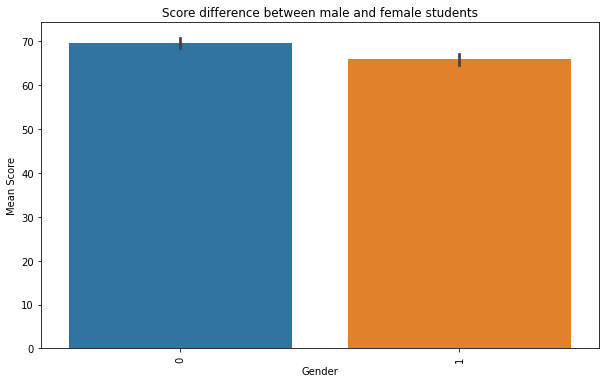

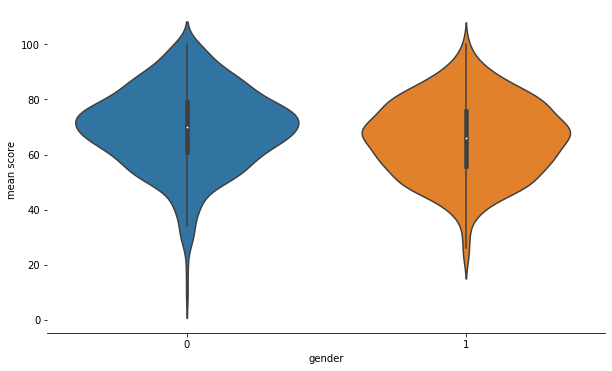

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=data['gender'],y=data['mean score'])
plt.xticks(rotation=90)
plt.xlabel('Gender')
plt.ylabel('Mean Score')
plt.title('Score difference between male and female students')
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x=data['gender'],y=data['mean score'],split=True)
sns.despine(left=True)
plt.show()

In [24]:
data = data.drop(['math score', 'writing score', 'reading score'],axis = 1)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


In [25]:
from sklearn.model_selection import train_test_split
y = data['mean score']
x = data.drop(['mean score'], axis  = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

# **Model Building with Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [28]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [29]:
predictions = model.predict(x_test)

In [30]:
difference = abs(predictions - y_test)

In [31]:
difference.mean()

11.03

**Average error is 11.03 marks**

### **Word_Cloud:**

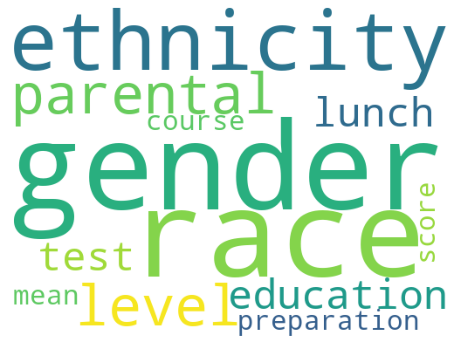

In [32]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.subplots(figsize=(8,8))
wordcloud=WordCloud(
    background_color='white',
    width=512,
    height=384).generate(' '.join(data))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

***Please upvote if you liked it :)***